In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("display.max_rows",None) #full dataset loading in notebook view
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
df = pd.read_csv('/content/Heart_Disease.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.info() #short info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Data Visualization**

<ipython-input-6-cedc307adfb6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-6-cedc307adfb6>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-6-cedc307adfb6>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.us

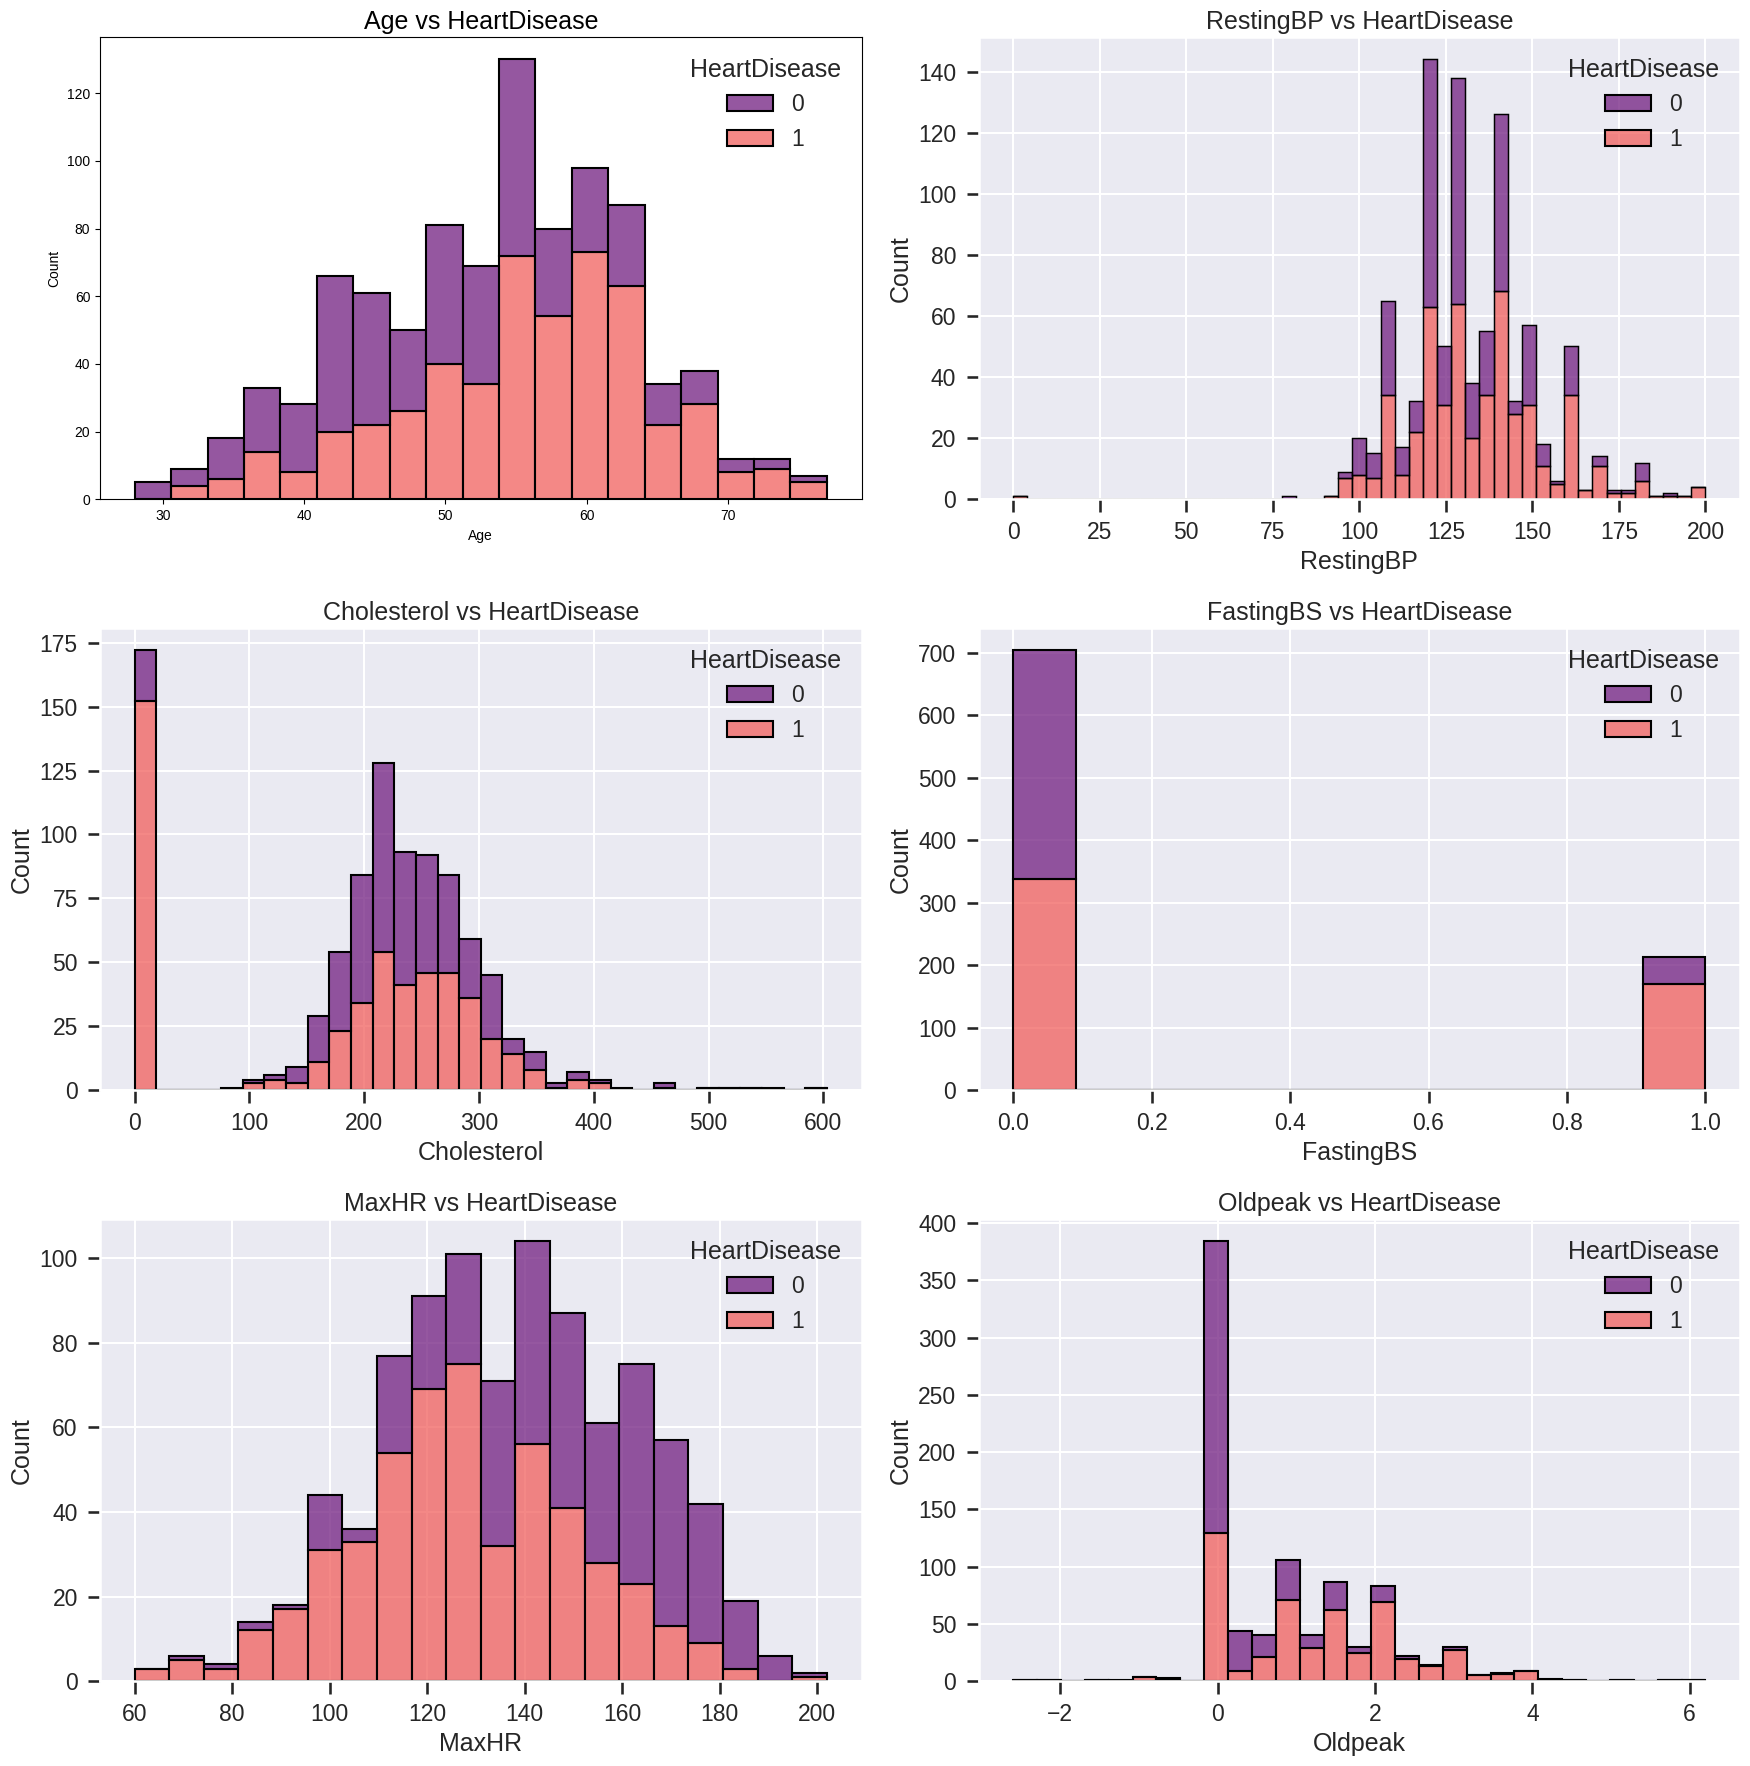

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

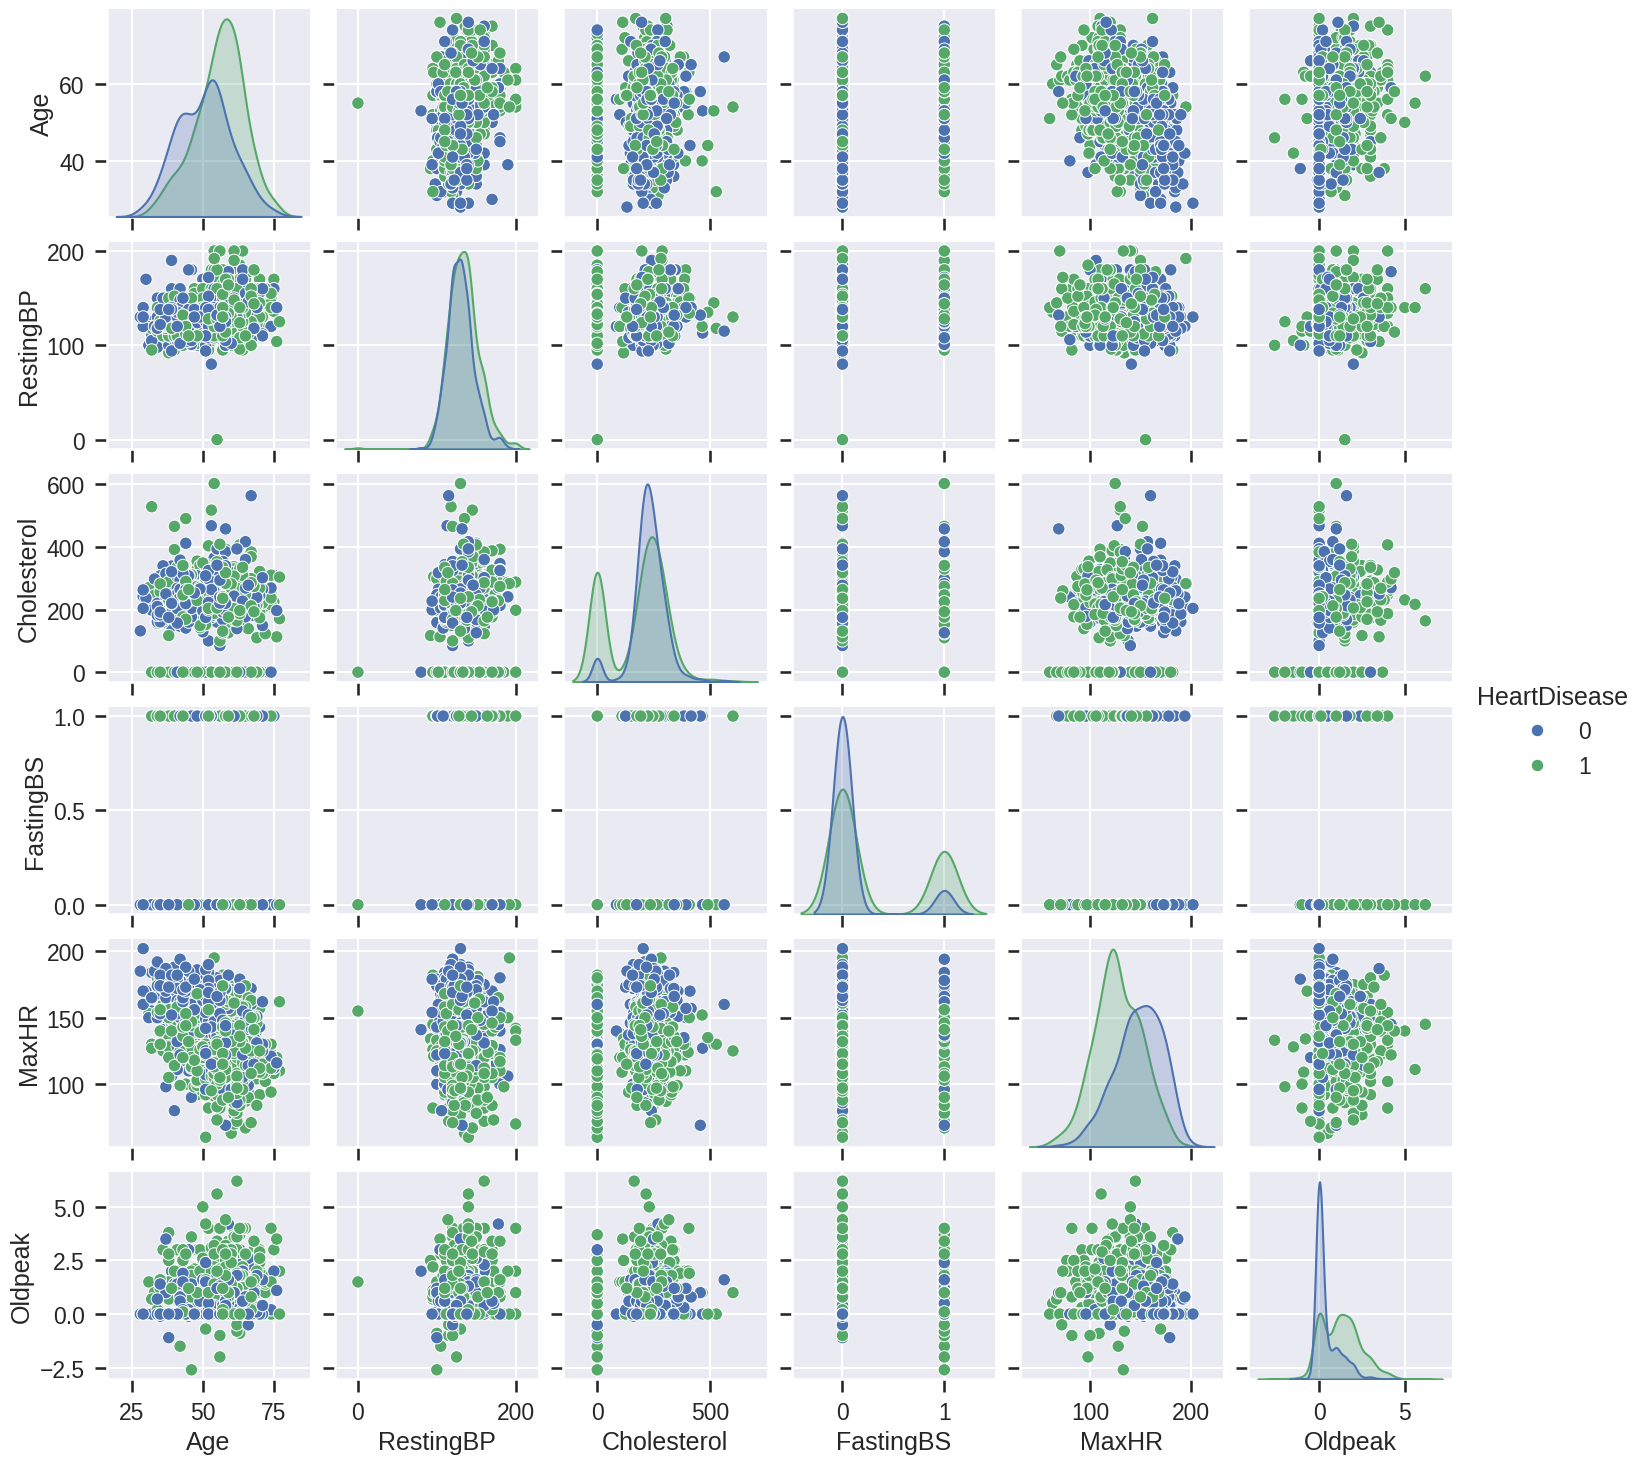

In [ ]:
sns.pairplot(df,hue='HeartDisease')

**Univariant Analysis**





<Axes: xlabel='Age', ylabel='Count'>

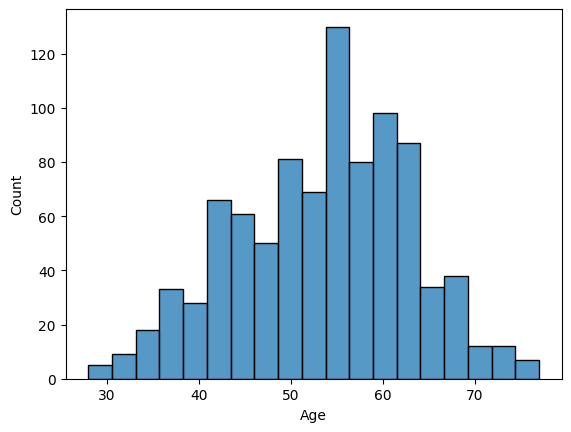

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/Heart_Disease.csv')
#numerical
sns.histplot(df['Age'])



<Axes: xlabel='count', ylabel='Sex'>

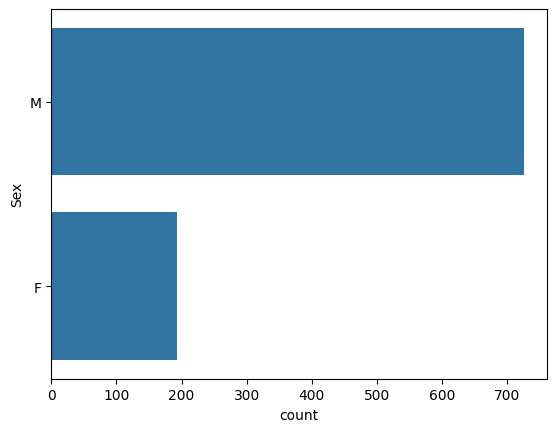

In [ ]:
#categorical
sns.countplot(df['Sex'])

**Bivariant Analysis**

<Axes: xlabel='ChestPainType', ylabel='Age'>

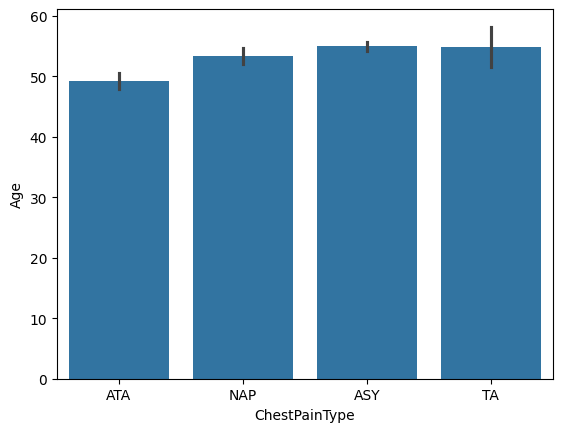

In [ ]:
#Categorical vs. Numerical
sns.barplot(x=df['ChestPainType'], y=df['Age'])

<Axes: xlabel='Cholesterol', ylabel='Age'>

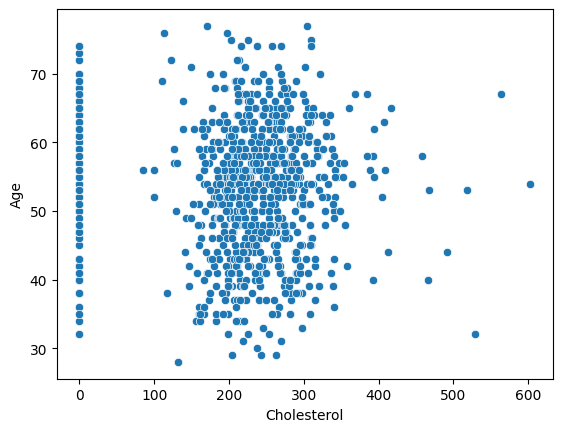

In [ ]:
#Numerical vs Numerical
sns.scatterplot(x=df['Cholesterol'], y=df['Age'])


**Data Preprocessing**

In [ ]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25])
    IQR = Q75 - Q25
    print('\nQ25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))
outliers_graph(df['Age'])
outliers_graph(df['RestingBP'])
outliers_graph(df['Cholesterol'])
outliers_graph(df['FastingBS'])
outliers_graph(df['MaxHR'])
outliers_graph(df['Oldpeak'])



Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26

Q25:  173.25
Q75:  267.0
Inter Quartile Range:  93.75
Outliers lie before 32.625 and beyond 407.625
Number of Rows with Left Extreme Outliers: 172
Number of Rows with Right Extreme Outliers: 11

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 214

Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**One Hot Encoding**

In [ ]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True)
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull')
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


**Scaling**

In [ ]:
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]

# printing the altered DataFrame
df.head(5)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,True,False,False,True,True,False,False,False,True,0
1,49,160,180,0,156,1.0,False,True,False,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,True,False,False,True,False,True,False,False,True,0
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195,0,122,0.0,False,True,False,True,True,False,False,False,True,0


In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,2.075177,-0.532838,-0.229679,0.515952,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-0.481887,1.876744,-0.229679,-1.938163,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,2.075177,-0.532838,-0.229679,0.515952,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-0.481887,-0.532838,-0.229679,-1.938163,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.481887,1.876744,-0.229679,0.515952,0.814275,-0.490449,-0.823556,-1.002181,1.150674


**Feature Selection**

In [ ]:
col=df.describe().columns.to_list()
print(col)
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


**Model Selection**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.875 (0.033)
Accuracy of SVC: 0.877 (0.030)
Accuracy of RandomForest: 0.873 (0.029)


**K Value Estimation**

1 0.1565217391304348
2 0.14347826086956522
3 0.1391304347826087
4 0.14347826086956522
5 0.1391304347826087
6 0.14347826086956522
7 0.12608695652173912
8 0.11304347826086956
9 0.10869565217391304
10 0.12608695652173912
11 0.11304347826086956
12 0.12608695652173912
13 0.13043478260869565
14 0.1391304347826087
15 0.1391304347826087
16 0.13478260869565217
17 0.12608695652173912
18 0.12173913043478261
19 0.12608695652173912
20 0.12608695652173912
21 0.13043478260869565
22 0.13043478260869565
23 0.14347826086956522
24 0.13043478260869565
25 0.13043478260869565
26 0.12608695652173912
27 0.13043478260869565
28 0.11739130434782609
29 0.12608695652173912
30 0.12173913043478261
31 0.12608695652173912
32 0.12608695652173912
33 0.12173913043478261
34 0.12608695652173912
35 0.12608695652173912
36 0.12173913043478261
37 0.12173913043478261
38 0.12173913043478261
39 0.12608695652173912


Text(0, 0.5, 'Error Rate')

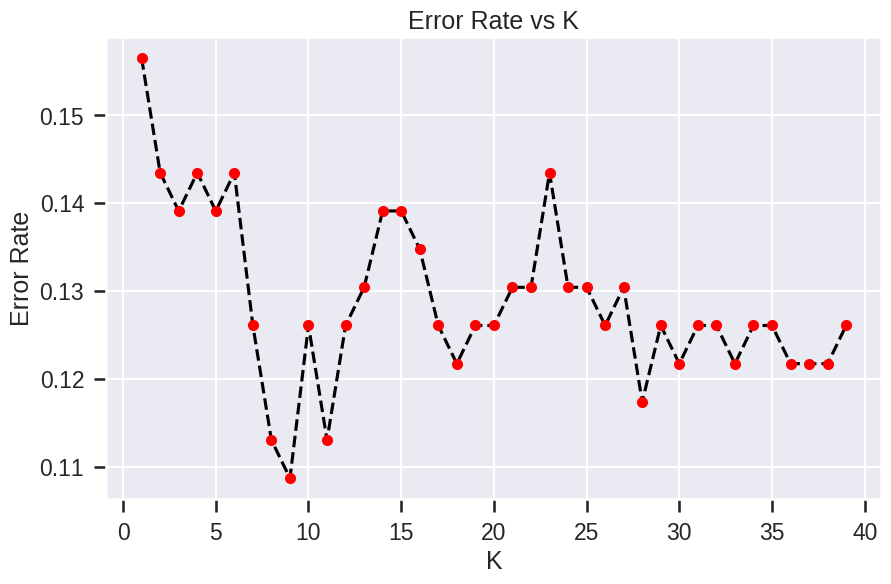

In [ ]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

**KNN model**

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       108
           1       0.86      0.92      0.89       122

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



------------------------
Confusion Matrix
------------------------

[[ 90  18]
 [ 10 112]]


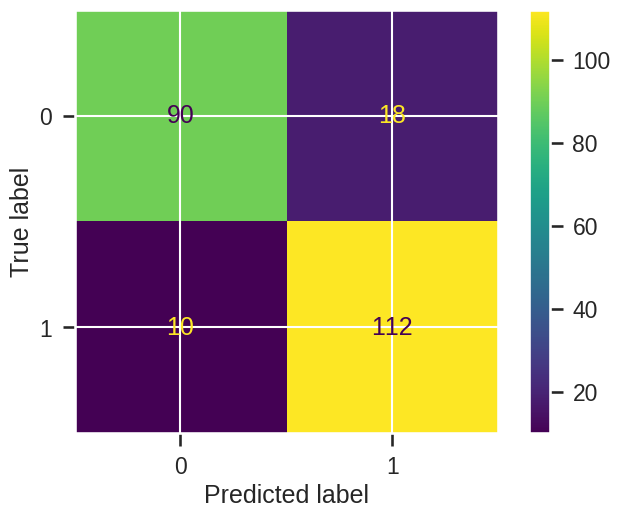

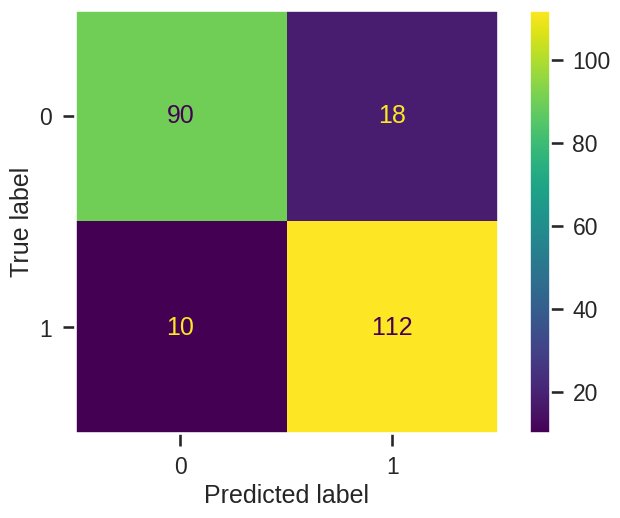

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.plot()
#plot_confusion_matrix(classifier, X_test, y_test,cmap="binary")
plt.grid(False)


**Support Vector Classifier**

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       108
           1       0.86      0.92      0.89       122

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



------------------------
Confusion Matrix
------------------------

[[ 90  18]
 [ 10 112]]


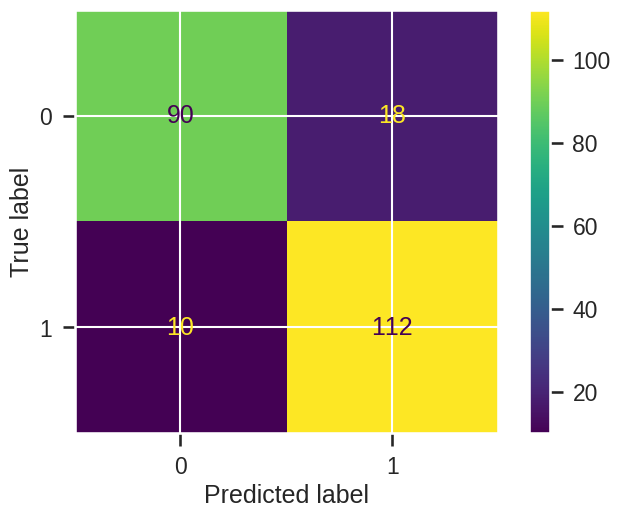

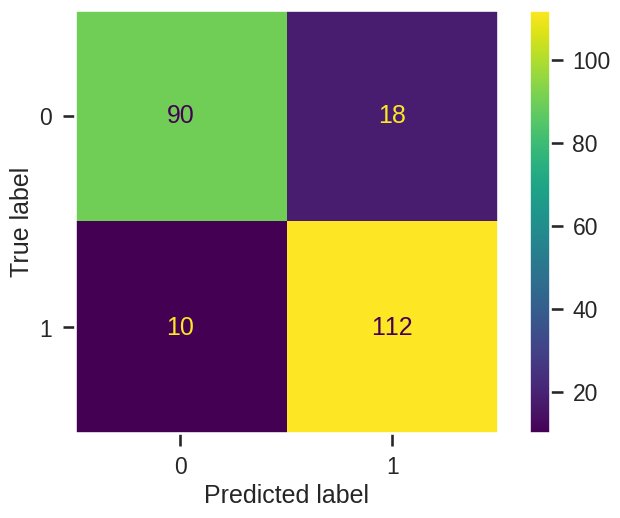

In [ ]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.plot()
plt.grid(False)


**Gradient Boosting Classifier**

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       108
           1       0.85      0.91      0.88       122

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230


------------------------
Confusion Matrix
------------------------

[[ 88  20]
 [ 11 111]]


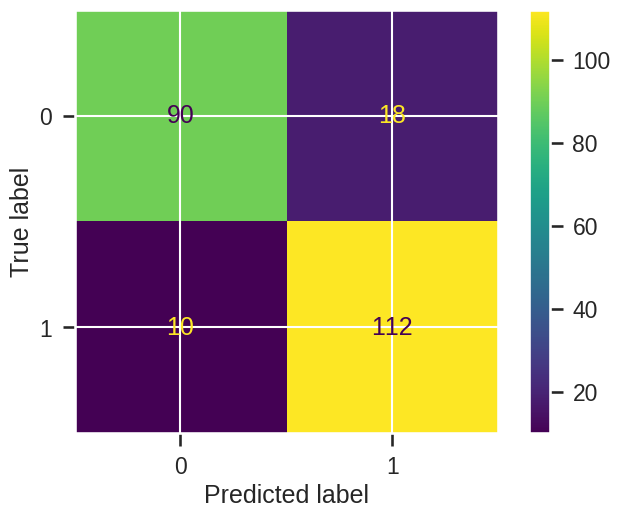

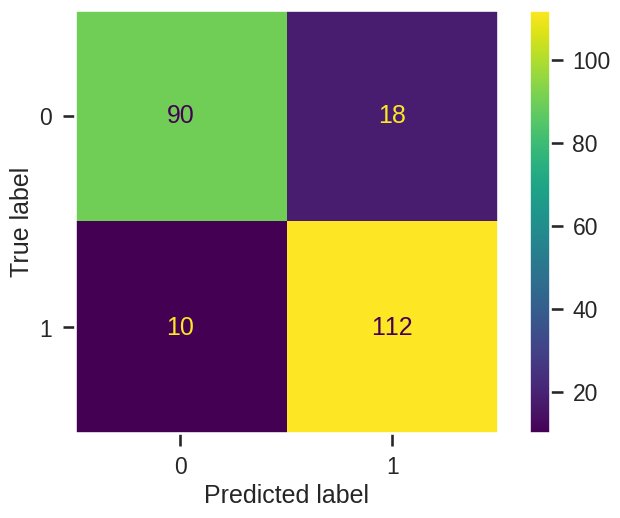

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.plot()
plt.grid(False)


**Conclusion**

KNN model gives the accuracy of                   : 89%


Suport Vector Classifier gives the accuracy of    : 88%

Gradient Boosting Classifier gives the accuracy of: 86%